# Imports

In [1]:
import warnings
import pandas  as pd

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [2]:
# warnings.filterwarnings("ignore")

In [3]:
from dstoolkit.feature_engine import SimpleLagTimeFeatureCreator

In [4]:
from dstoolkit.automl import AutoMLCatBoostRegressor, AutoMLCatBoostRegressorCV

/home/junior/GitHub/data-science-toolkit/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Regressor

In [5]:
df = pd.read_csv('../data/global_temperature_time_series.csv', )
df['time'] = pd.to_datetime(df['Year'])
df = df.drop(columns=['Source', 'Year']).rename(columns={'Mean': 'temperature'})

s = SimpleLagTimeFeatureCreator([2, 3, 4, 5, 6], ["mean", "median", "max", "min", "std", "slope"])
df1 = s.create(df, target='temperature', time='time')
df1 = df1.dropna()

X = df1.drop(columns=['time', 'temperature'])
y = df1[['temperature']]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.55, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=0.6, random_state=42)

In [6]:
best_features_reg = [
    'temperature_lag_1',
    'temperature_lag_3',
    'temperature_lag_4',
    'temperature_mean_last_2_lags',
    'temperature_mean_last_3_lags',
    'temperature_mean_last_4_lags',
    'temperature_mean_last_5_lags',
    'temperature_median_last_2_lags',
    'temperature_median_last_4_lags',
    'temperature_median_last_5_lags',
    'temperature_median_last_6_lags',
    'temperature_max_last_2_lags',
    'temperature_max_last_3_lags',
    'temperature_max_last_4_lags',
    'temperature_max_last_5_lags',
    'temperature_max_last_6_lags',
    'temperature_min_last_2_lags',
    'temperature_min_last_3_lags',
    'temperature_min_last_5_lags',
    'temperature_min_last_6_lags']

In [7]:
a = AutoMLCatBoostRegressor(
    X_train, y_train, 
    X_valid, y_valid,
    X_test, y_test,
    target='temperature',
    best_features=best_features_reg,
    n_trials=50,
    scoring='root_mean_squared_error'
)

In [8]:
a.train()

In [9]:
a.get_metrics()

Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.939925  0.076773  0.061292  1.492354e+12  0.099666   
1   Valid  0.915981  0.086111  0.068611  3.780300e+11  0.114528   
2    Test  0.923120  0.089558  0.071088  1.938513e+12  0.115397   
3   Train  0.928126  0.084151  0.067692  1.594436e+12  0.109016   
4   Valid  0.911380  0.090201  0.071845  3.512735e+11  0.117623   
5    Test  0.920813  0.091414  0.077084  2.096130e+12  0.117115   
6   Train  0.942991  0.076022  0.061714  1.502516e+12  0.097090   
7   Valid  0.913231  0.089061  0.070100  3.699128e+11  0.116388   
8    Test  0.921801  0.090796  0.076222  2.422326e+12  0.116382   

   Explained Variance               Model  
0            0.939925          Base Model  
1            0.915991          Base Model  
2            0.923146          Base Model  
3            0.928126  Best Feature Model  
4            0.911380  Best Feature Model  
5            0.920837  Best Feature Model  
6            0.942991   Best Params Model  
7            0.913232   Best Params Model  
8            0.921824   Best Params Model

base_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.939925  0.076773  0.061292  1.492354e+12  0.099666   
1   Valid  0.915981  0.086111  0.068611  3.780300e+11  0.114528   
2    Test  0.923120  0.089558  0.071088  1.938513e+12  0.115397   

   Explained Variance  
0            0.939925  
1            0.915991  
2            0.923146

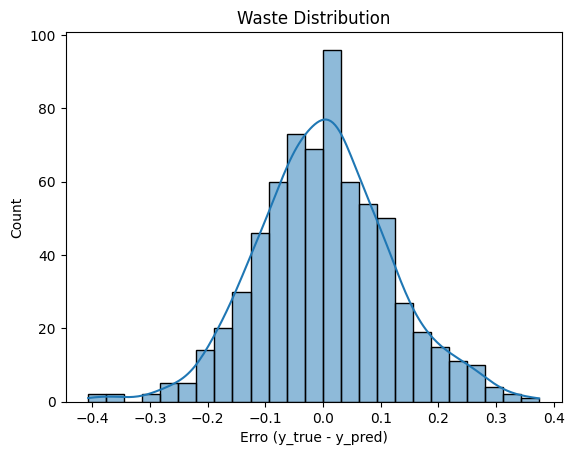

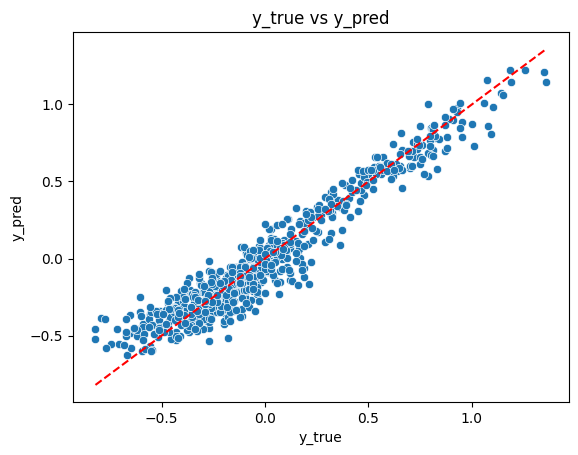

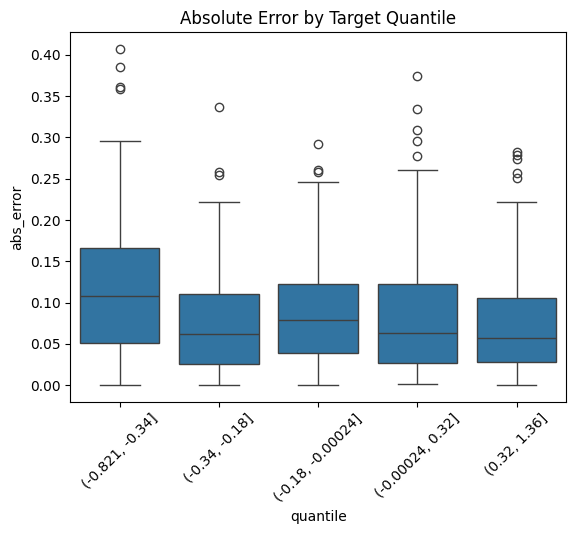

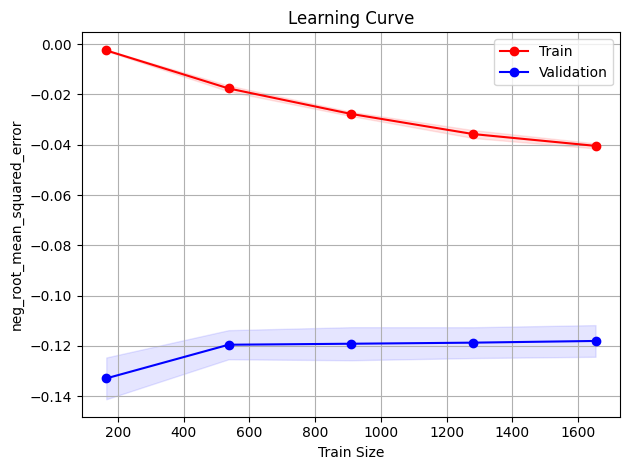

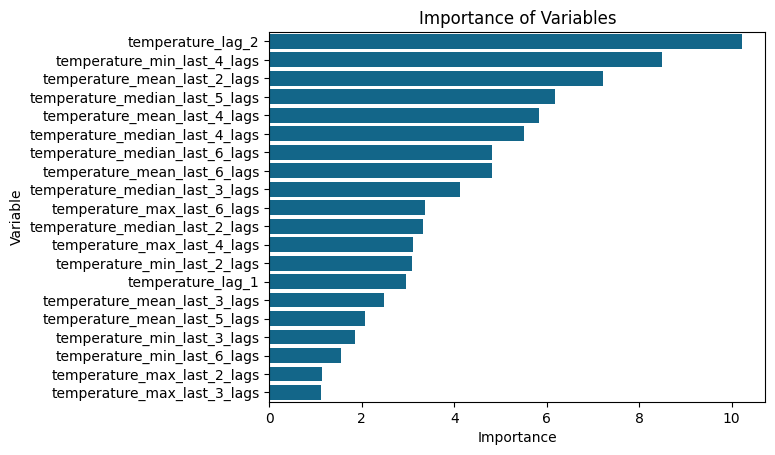

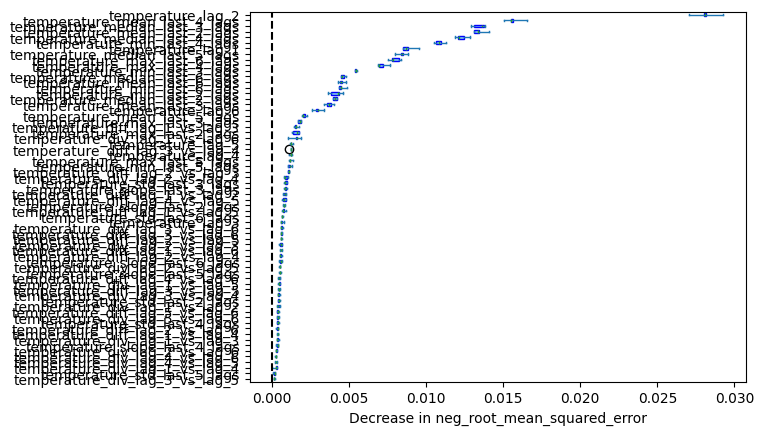

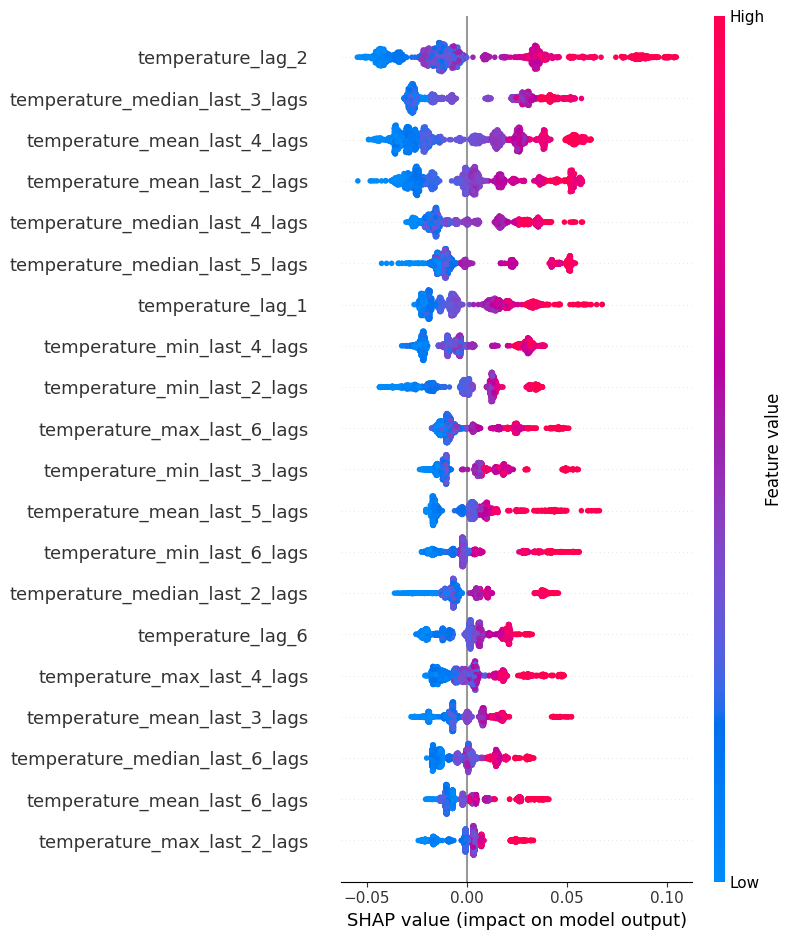

best_feature_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.928126  0.084151  0.067692  1.594436e+12  0.109016   
1   Valid  0.911380  0.090201  0.071845  3.512735e+11  0.117623   
2    Test  0.920813  0.091414  0.077084  2.096130e+12  0.117115   

   Explained Variance  
0            0.928126  
1            0.911380  
2            0.920837

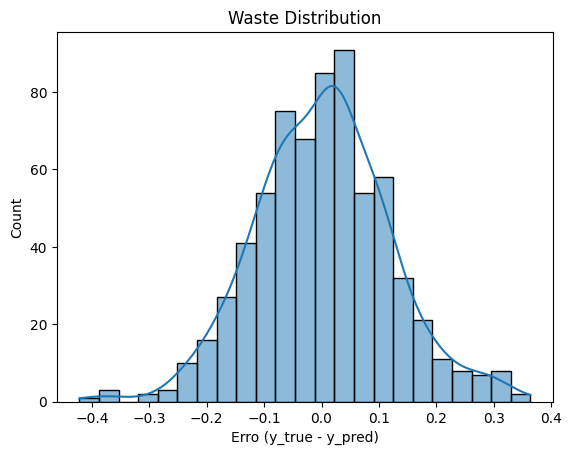

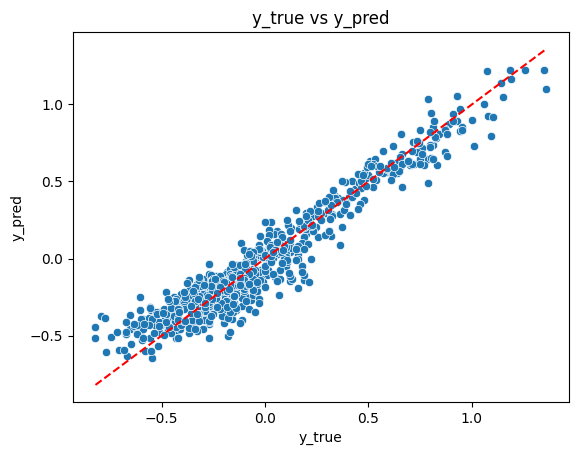

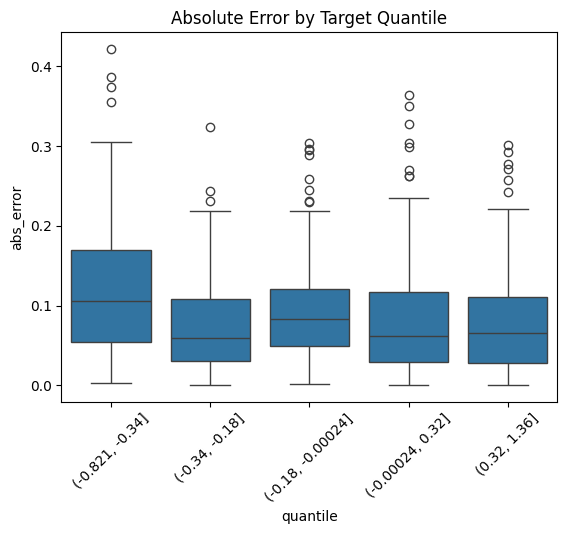

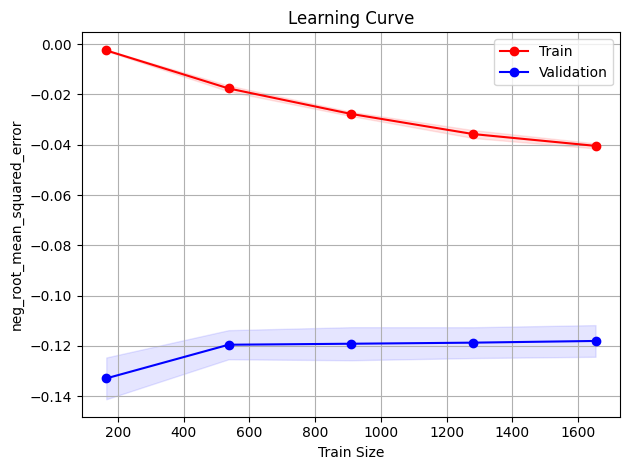

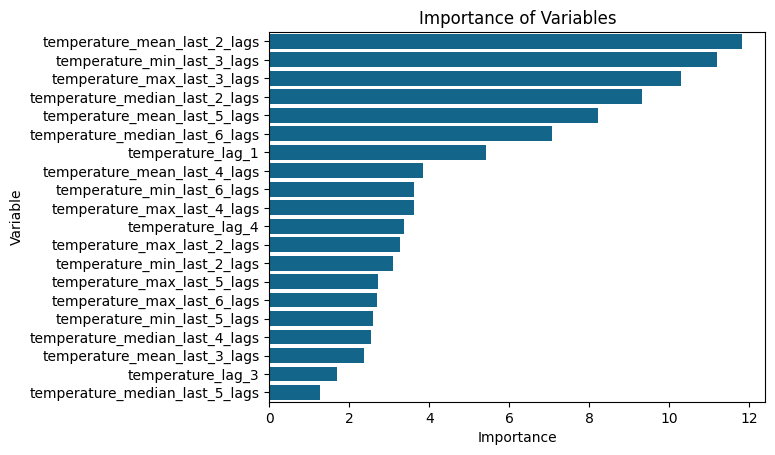

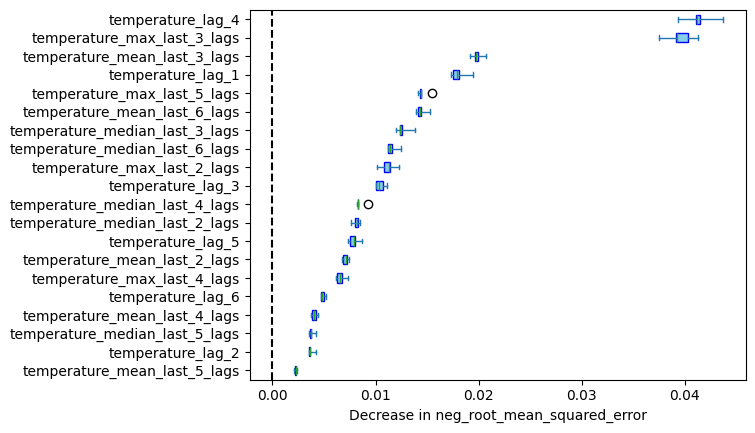

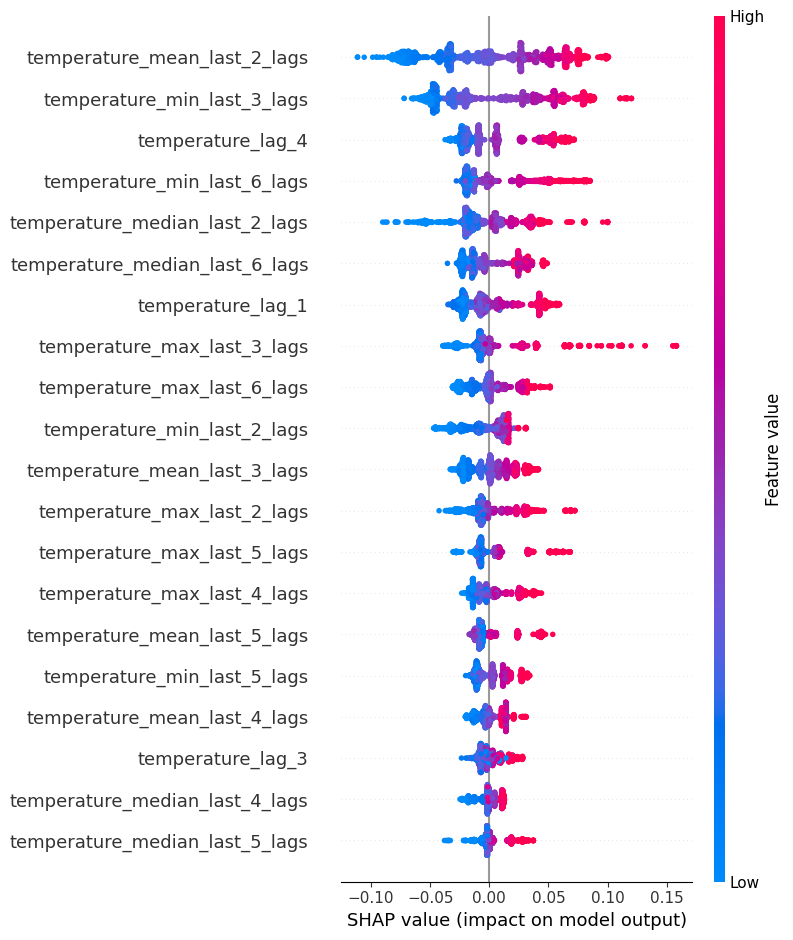

best_params_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.942991  0.076022  0.061714  1.502516e+12  0.097090   
1   Valid  0.913231  0.089061  0.070100  3.699128e+11  0.116388   
2    Test  0.921801  0.090796  0.076222  2.422326e+12  0.116382   

   Explained Variance  
0            0.942991  
1            0.913232  
2            0.921824

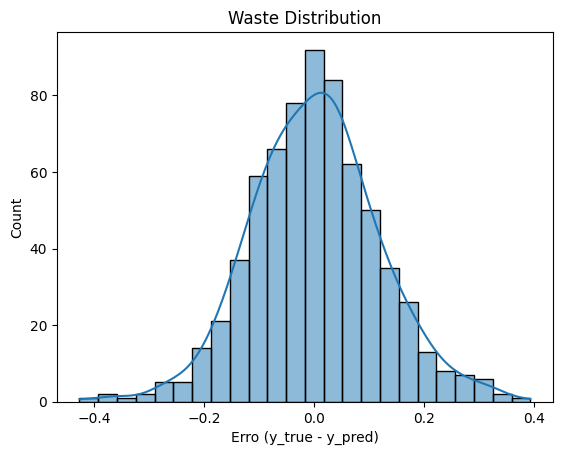

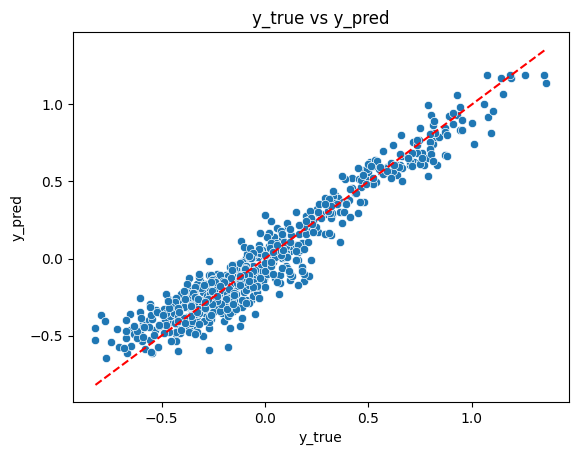

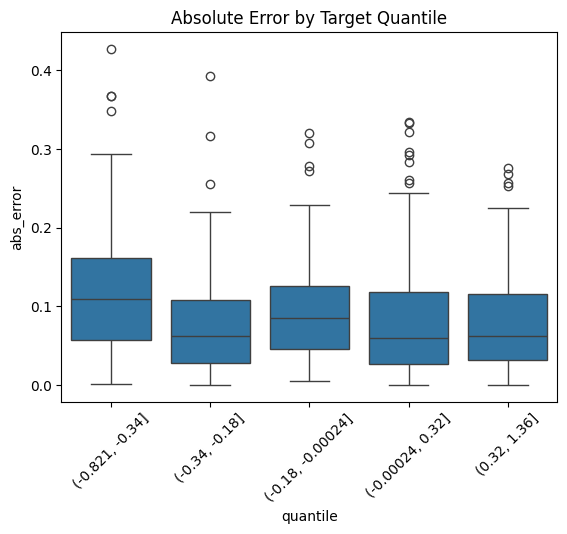

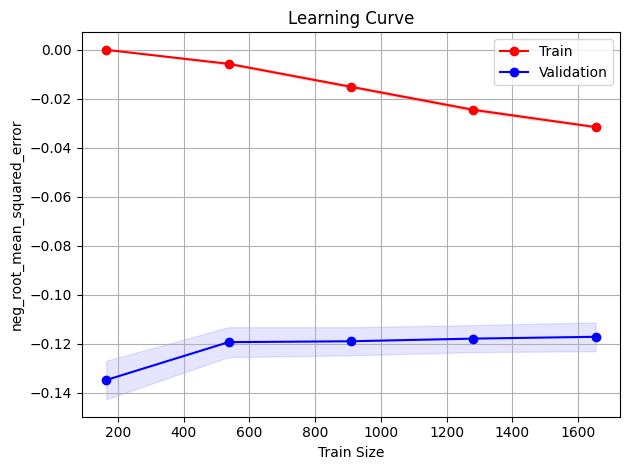

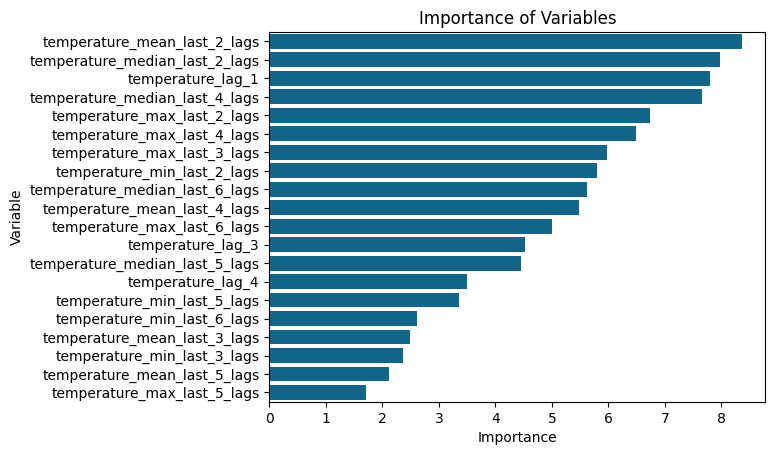

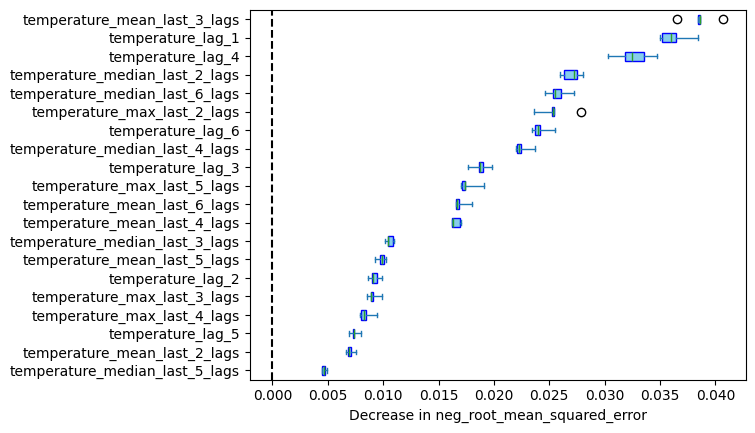

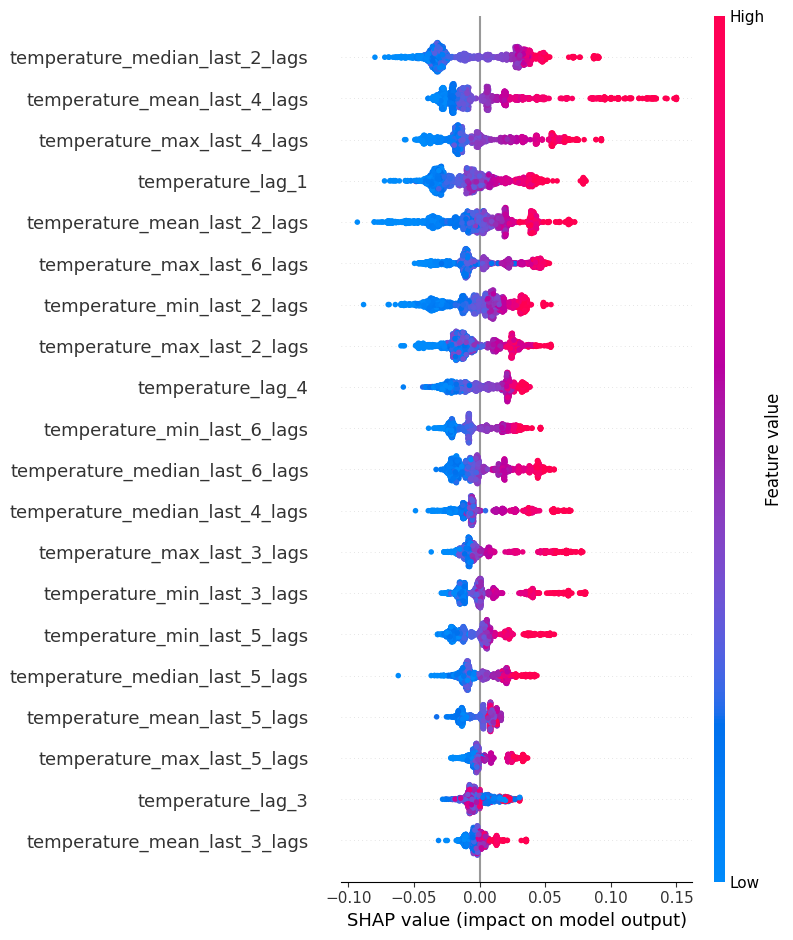

In [10]:
a.get_result_analysis()

In [11]:
acv = AutoMLCatBoostRegressorCV(
    X_train, y_train, 
    X_test, y_test,
    target='temperature',
    cv=KFold(shuffle=True, random_state=42),
    best_features=best_features_reg,
    n_trials=50,
    scoring='r2',
    random_state=42
)

In [12]:
acv.train()

In [13]:
acv.get_metrics()

Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0  Train CV  0.915352  0.089414  0.069070  1.843398e+12  0.117957   
1      Test  0.921749  0.089760  0.070893  2.036892e+12  0.116421   
2  Train CV  0.913964  0.090527  0.072459  1.733469e+12  0.118911   
3      Test  0.920446  0.090464  0.073095  2.543510e+12  0.117386   
4  Train CV  0.918439  0.088815  0.071469  1.793176e+12  0.115784   
5      Test  0.922042  0.090599  0.076383  2.314572e+12  0.116203   

   Explained Variance               Model  
0            0.915473          Base Model  
1            0.921771          Base Model  
2            0.914054  Best Feature Model  
3            0.920521  Best Feature Model  
4            0.918584   Best Params Model  
5            0.922056   Best Params Model

base_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0  Train CV  0.915352  0.089414  0.069070  1.843398e+12  0.117957   
1      Test  0.921749  0.089760  0.070893  2.036892e+12  0.116421   

   Explained Variance  
0            0.915473  
1            0.921771

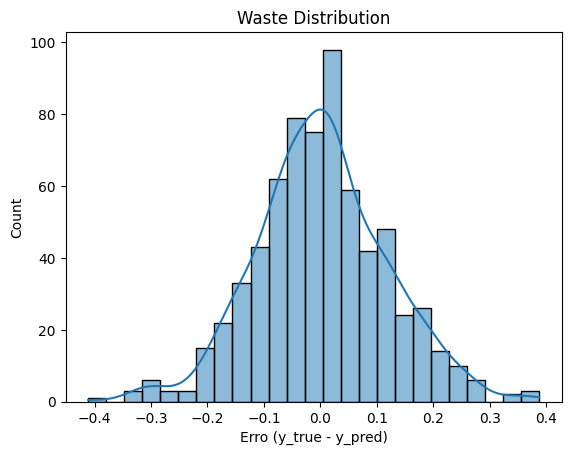

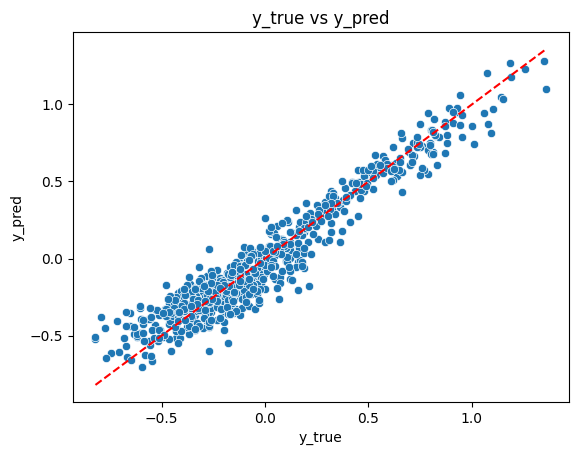

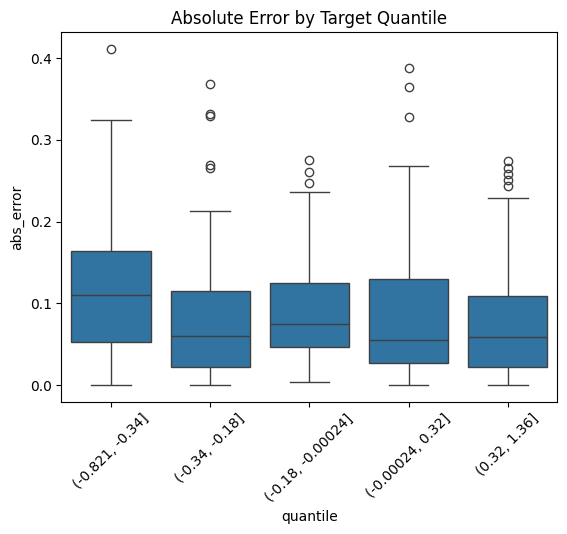

In [ ]:
acv.get_result_analysis()

# Classifier

In [ ]:
from dstoolkit.automl import AutoMLCatBoostClassifier, AutoMLCatBoostClassifierCV

In [ ]:
df = pd.read_csv('../data/cs-training.csv')

X = df.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
y = df[['SeriousDlqin2yrs']].rename({'SeriousDlqin2yrs': 'target'}, axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y['target'])
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=0.6, random_state=42, stratify=y_temp['target'])

In [ ]:
y_train.value_counts()

target
0         83984
1          6016
Name: count, dtype: int64

In [ ]:
best_features_class = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'MonthlyIncome',
    'NumberOfTimes90DaysLate']

In [ ]:
a = AutoMLCatBoostClassifier(
    X_train, y_train, 
    X_valid, y_valid, 
    X_test, y_test, 
    target='target', 
    best_features=best_features_class,
    n_trials=50,
    scoring='brier'
)

In [ ]:
a.train()

In [ ]:
a.get_metrics()

Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.251256           0.719204   0.464384  0.477892  0.471041   
1   Valid  0.185930           0.743717   0.399878  0.546135  0.461701   
2    Test  0.211055           0.721183   0.397404  0.496259  0.441364   
3   Train  0.211055           0.708197   0.406955  0.464927  0.434013   
4   Valid  0.185930           0.725433   0.392535  0.507066  0.442510   
5    Test  0.201005           0.711608   0.386283  0.477556  0.427098   
6   Train  0.216080           0.706009   0.412741  0.458777  0.434543   
7   Valid  0.190955           0.723283   0.397952  0.500831  0.443504   
8    Test  0.180905           0.720370   0.366152  0.503117  0.423845   

        AUC        KS     Brier               Model  
0  0.876411  0.593259  0.045974          Base Model  
1  0.869846  0.584726  0.048291          Base Model  
2  0.862827  0.567183  0.049161          Base Model  
3  0.852874  0.550794  0.049004  Best Feature Model  
4  0.855664  0.558114  0.049304  Best Feature Model  
5  0.847695  0.538539  0.050446  Best Feature Model  
6  0.853020  0.551930  0.049100   Best Params Model  
7  0.855922  0.558652  0.049243   Best Params Model  
8  0.848013  0.540725  0.050525   Best Params Model

base_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.251256           0.719204   0.464384  0.477892  0.471041   
1   Valid  0.185930           0.743717   0.399878  0.546135  0.461701   
2    Test  0.211055           0.721183   0.397404  0.496259  0.441364   

        AUC        KS     Brier  
0  0.876411  0.593259  0.045974  
1  0.869846  0.584726  0.048291  
2  0.862827  0.567183  0.049161

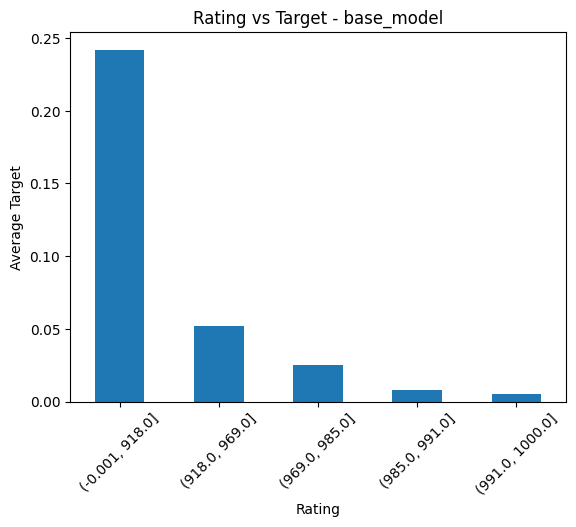

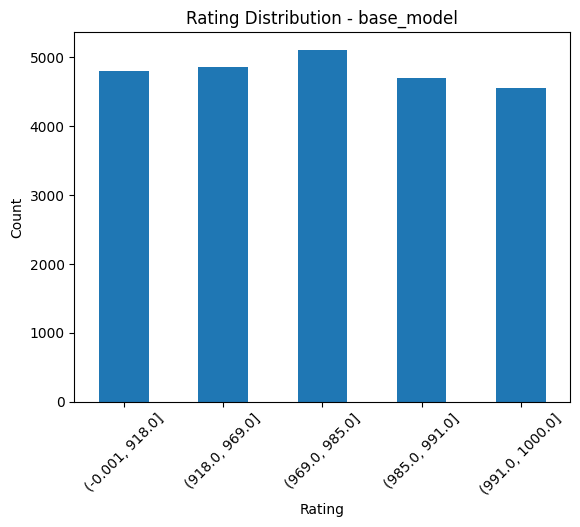

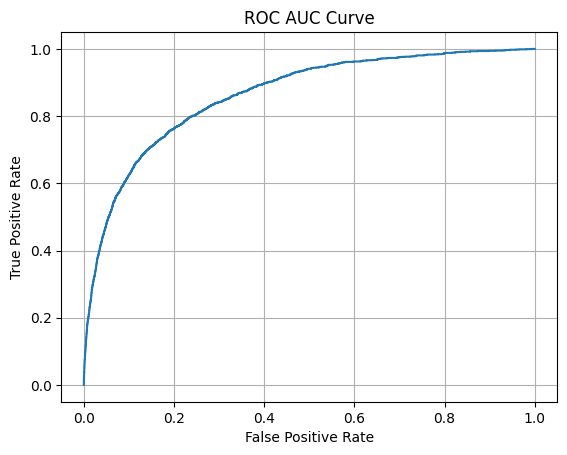

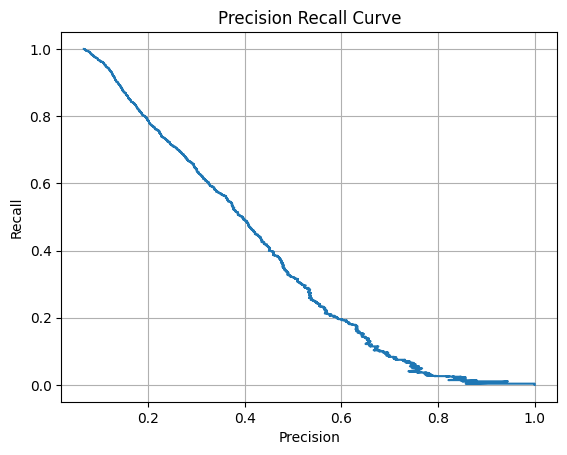

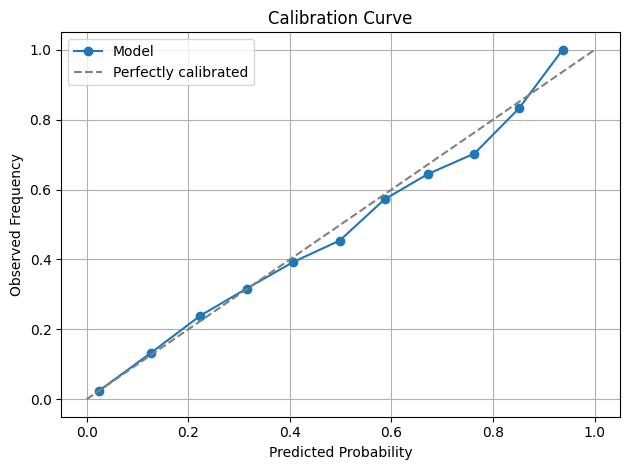

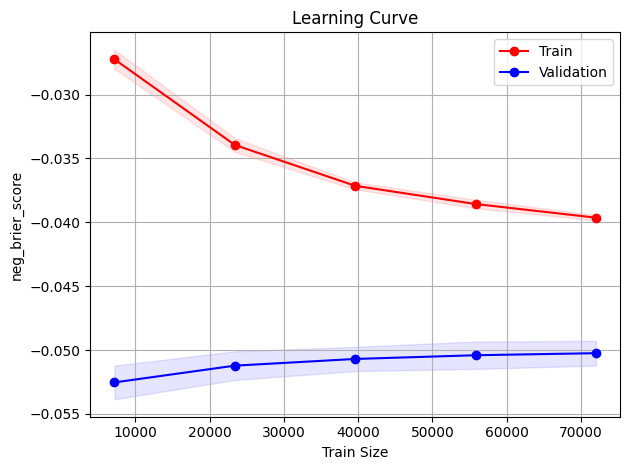

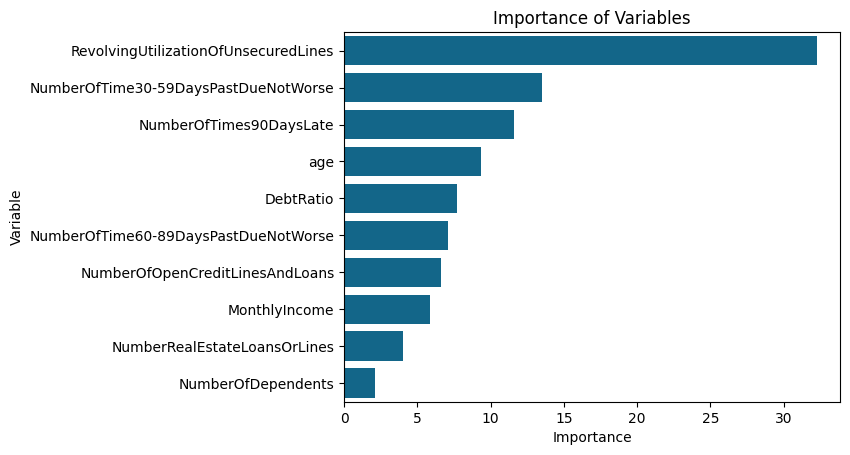

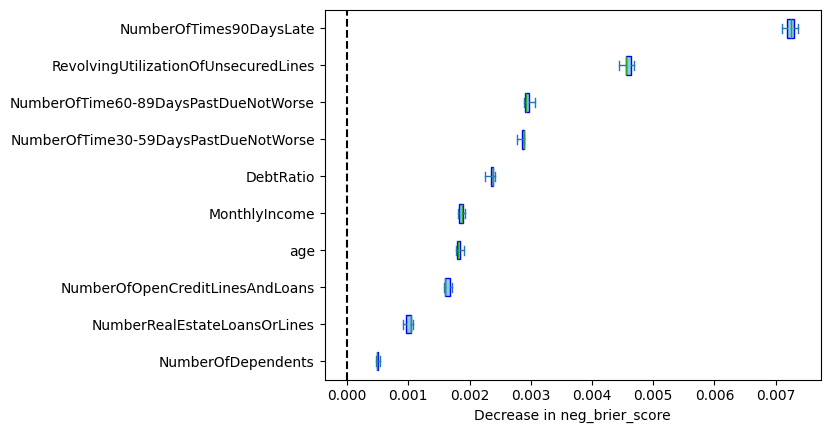

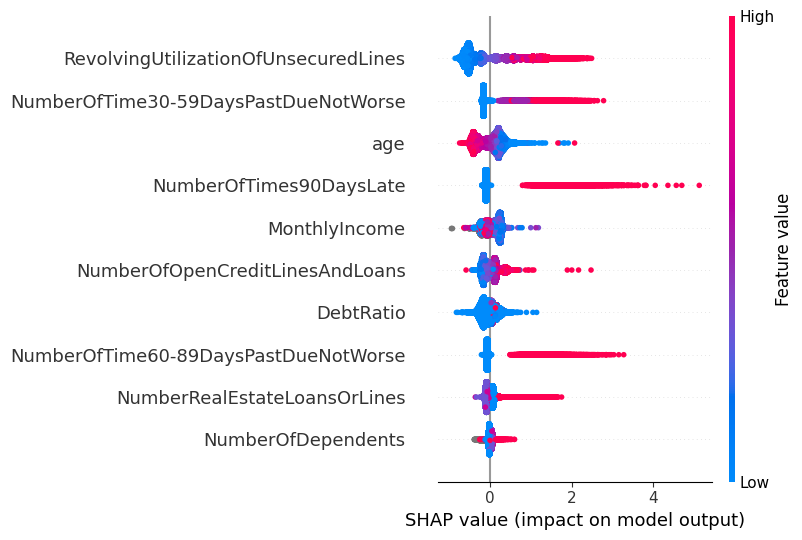

best_feature_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.211055           0.708197   0.406955  0.464927  0.434013   
1   Valid  0.185930           0.725433   0.392535  0.507066  0.442510   
2    Test  0.201005           0.711608   0.386283  0.477556  0.427098   

        AUC        KS     Brier  
0  0.852874  0.550794  0.049004  
1  0.855664  0.558114  0.049304  
2  0.847695  0.538539  0.050446

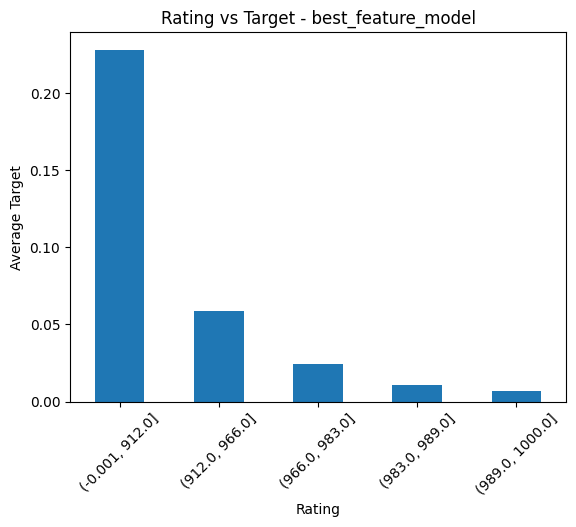

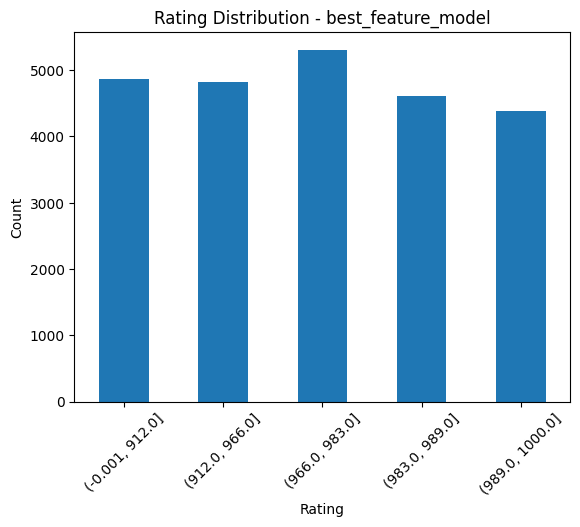

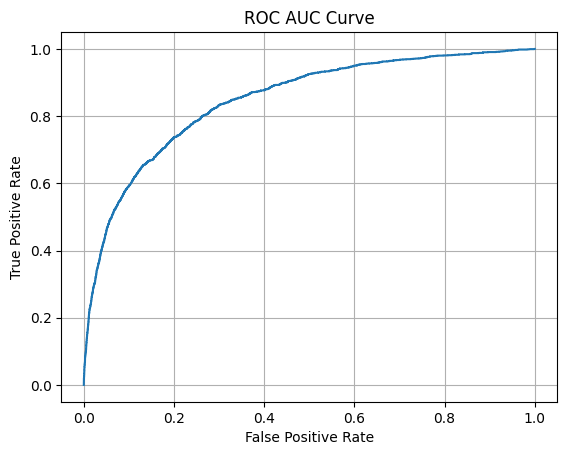

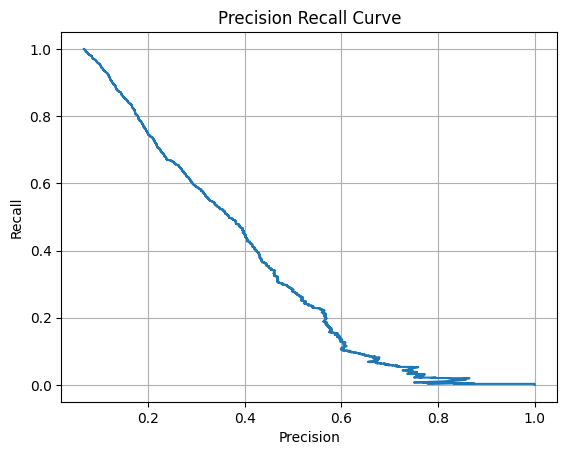

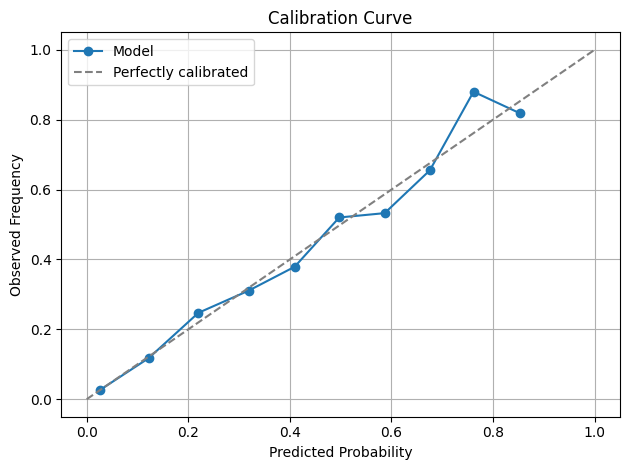

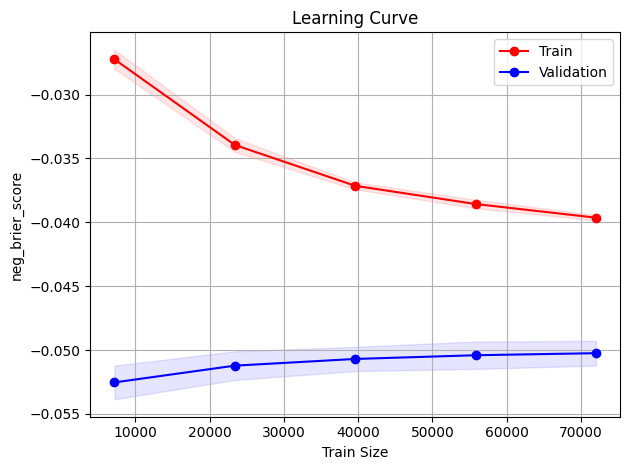

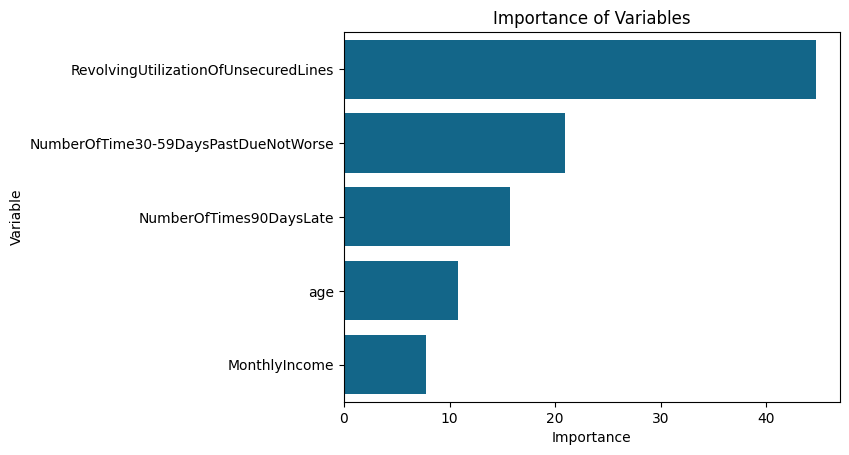

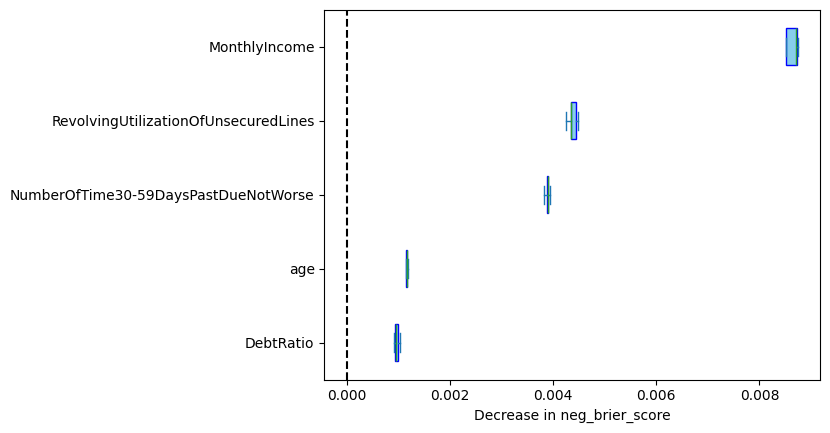

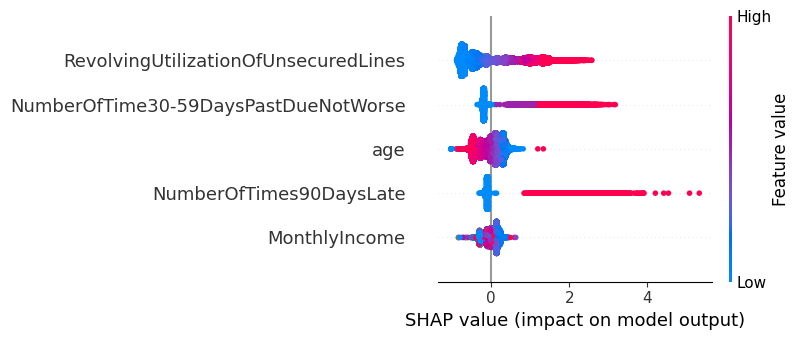

best_params_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.216080           0.706009   0.412741  0.458777  0.434543   
1   Valid  0.190955           0.723283   0.397952  0.500831  0.443504   
2    Test  0.180905           0.720370   0.366152  0.503117  0.423845   

        AUC        KS     Brier  
0  0.853020  0.551930  0.049100  
1  0.855922  0.558652  0.049243  
2  0.848013  0.540725  0.050525

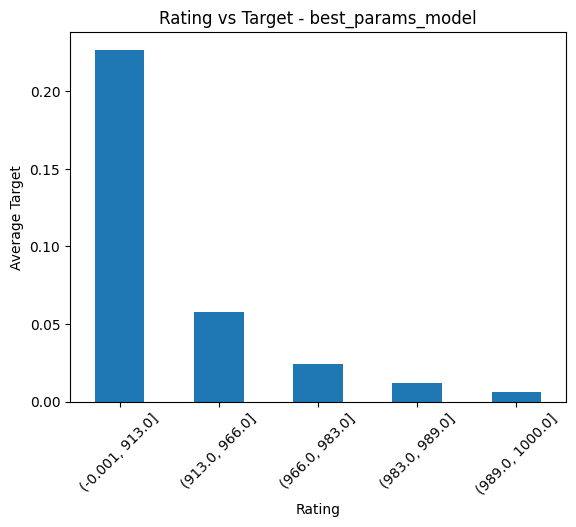

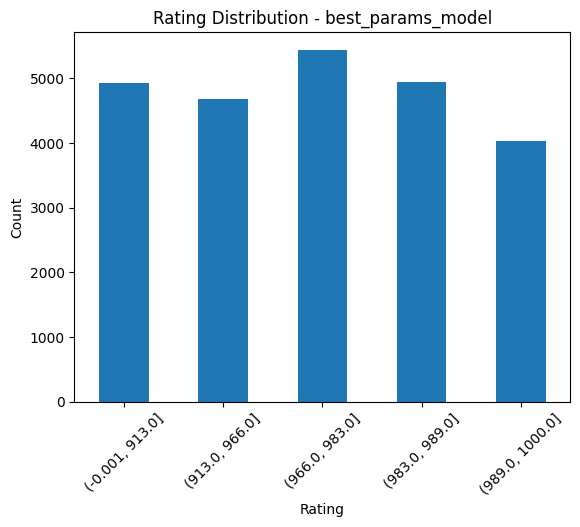

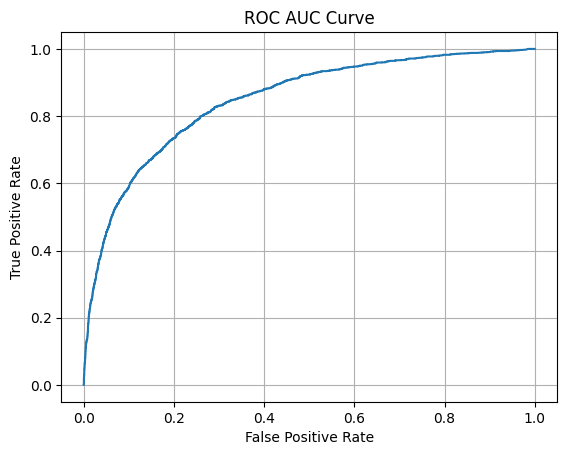

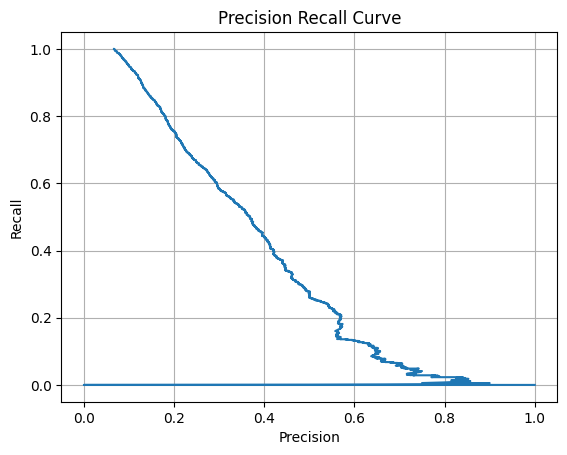

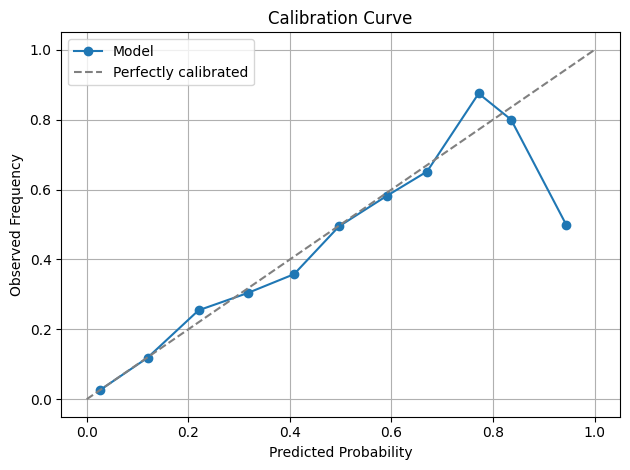

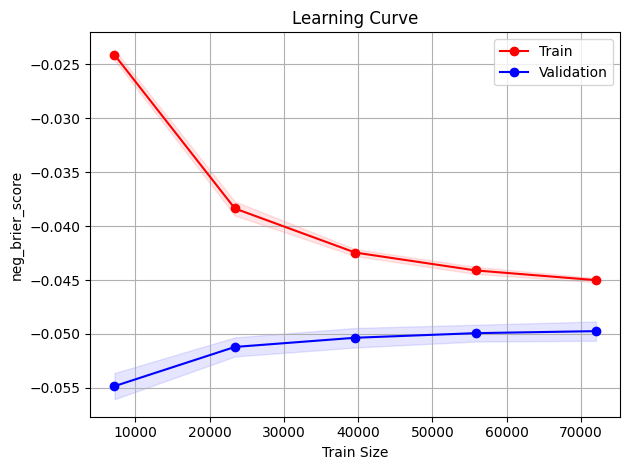

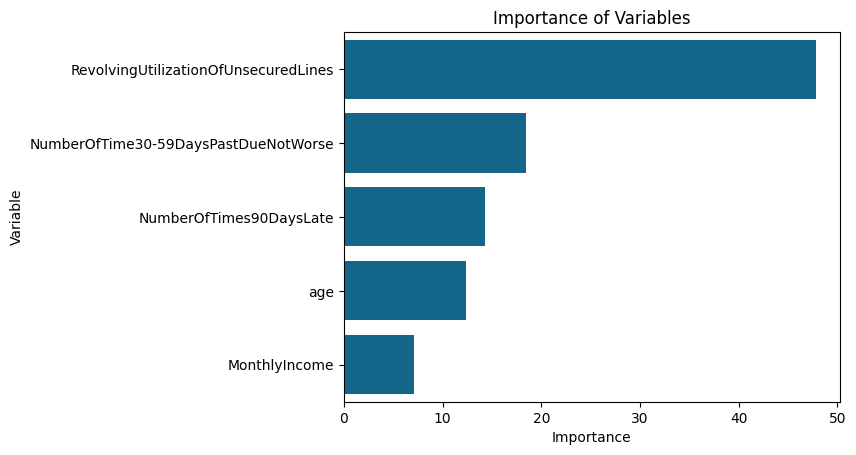

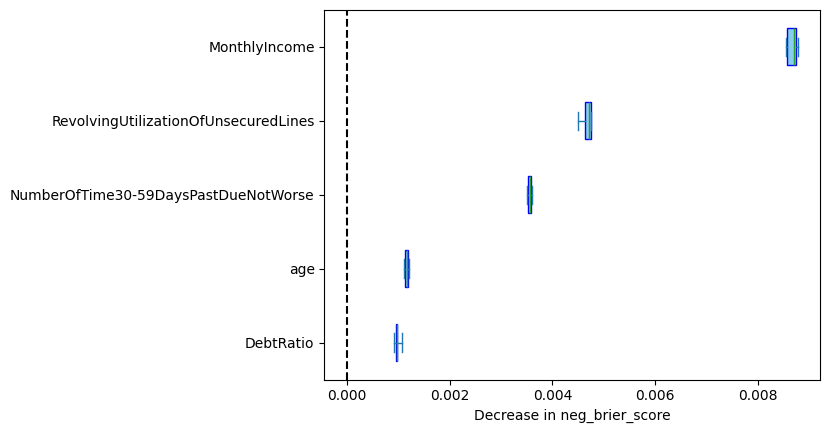

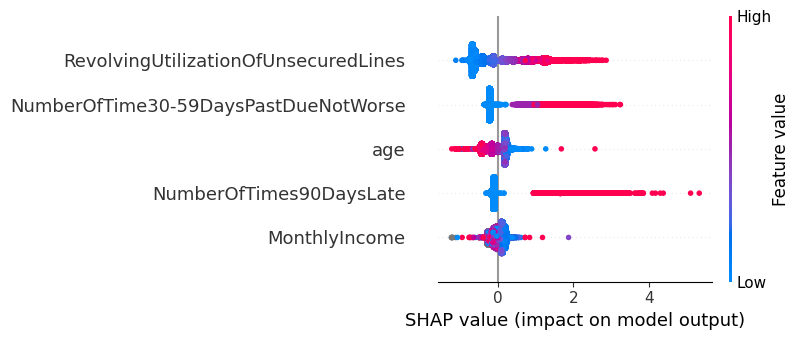

In [ ]:
a.get_result_analysis()

In [ ]:
acv = AutoMLCatBoostClassifierCV(
    X_train, y_train, 
    X_test, y_test, 
    target='target', 
    best_features=best_features_class,
    n_trials=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='brier'
)

In [ ]:
acv.train()

In [ ]:
acv.get_metrics()

Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV  0.500000           0.590197   0.564558  0.190991  0.285130   
1      Test  0.201005           0.722090   0.381629  0.502494  0.433800   
2  Train CV  0.500000           0.574936   0.548799  0.159243  0.246717   
3      Test  0.160804           0.723786   0.339715  0.519950  0.410939   
4  Train CV  0.500000           0.578684   0.582108  0.165893  0.258069   
5      Test  0.206030           0.705824   0.396681  0.461970  0.426843   

        AUC        KS     Brier               Model  
0  0.861494  0.572614  0.050347          Base Model  
1  0.860077  0.565370  0.049965          Base Model  
2  0.844617  0.540214  0.051613  Best Feature Model  
3  0.844409  0.538075  0.051272  Best Feature Model  
4  0.846962  0.546197  0.050458   Best Params Model  
5  0.847291  0.538364  0.050380   Best Params Model

base_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall       F1  \
0  Train CV  0.500000           0.590197   0.564558  0.190991  0.28513   
1      Test  0.201005           0.722090   0.381629  0.502494  0.43380   

        AUC        KS     Brier  
0  0.861494  0.572614  0.050347  
1  0.860077  0.565370  0.049965

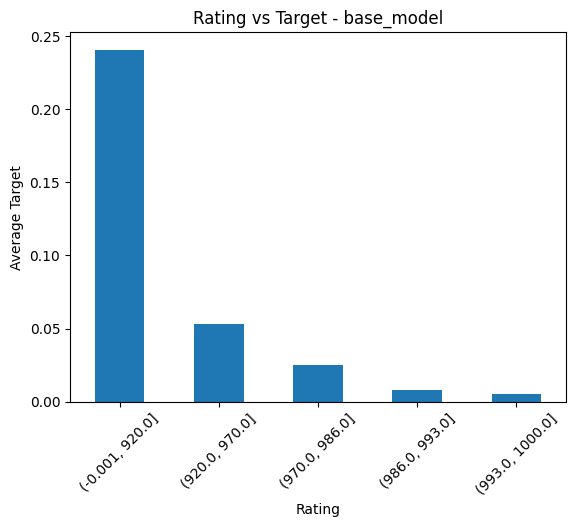

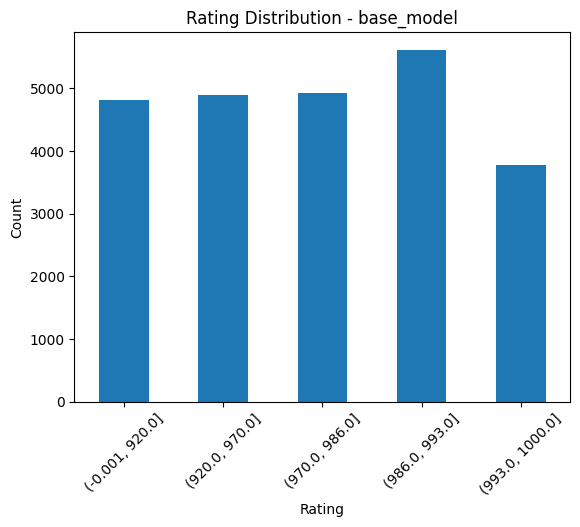

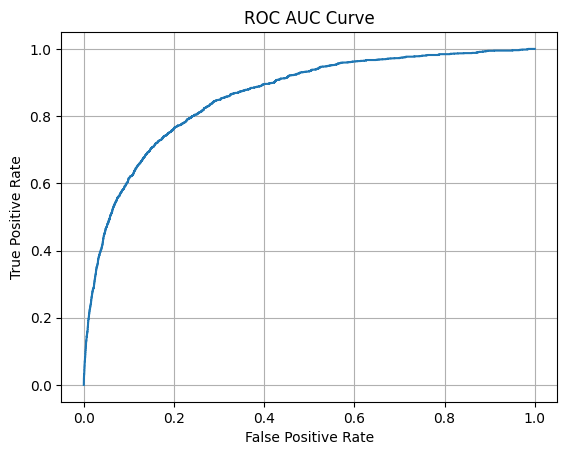

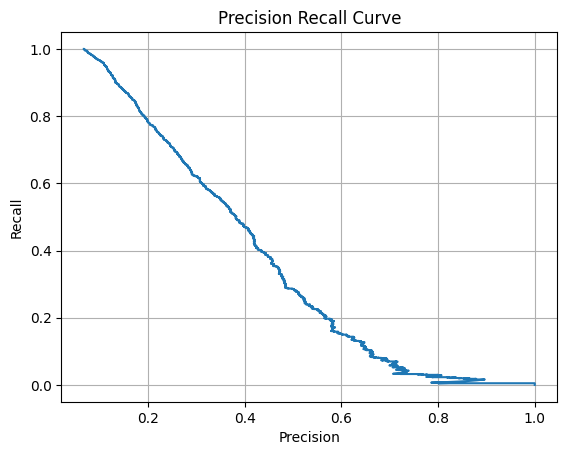

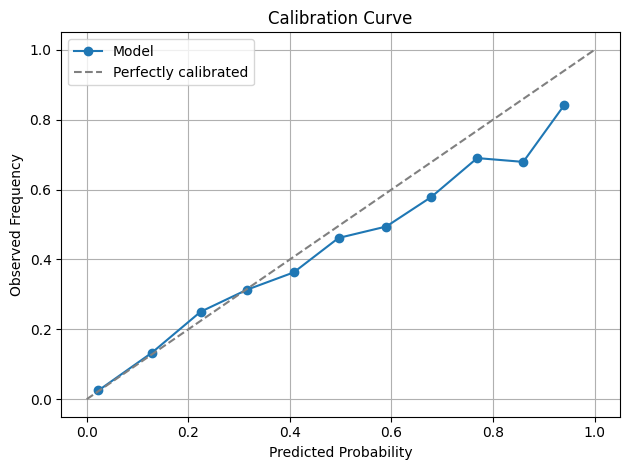

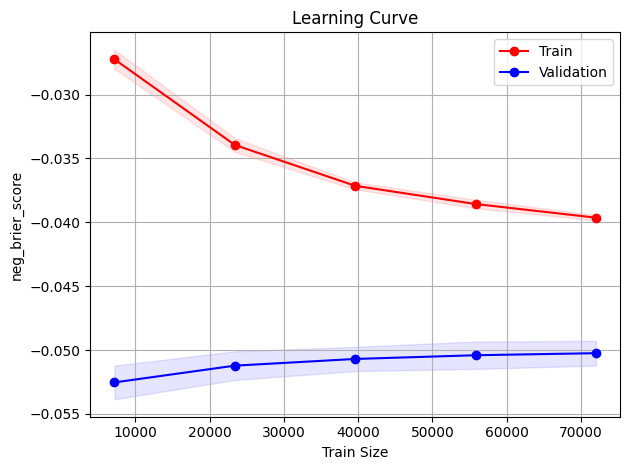

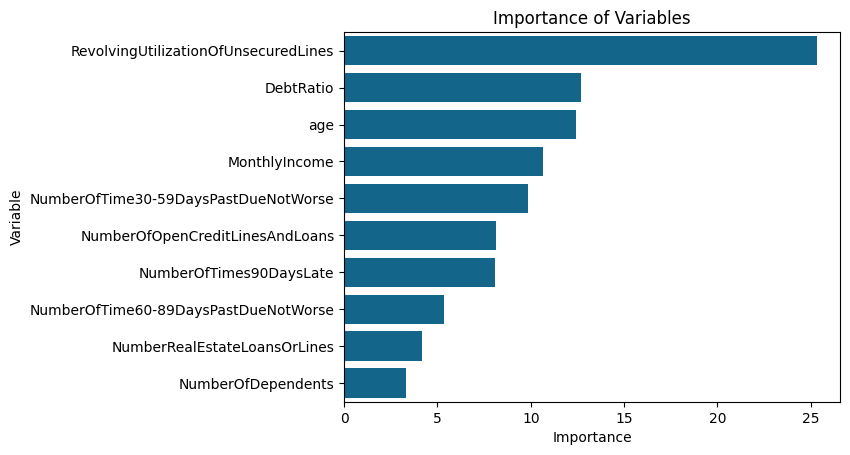

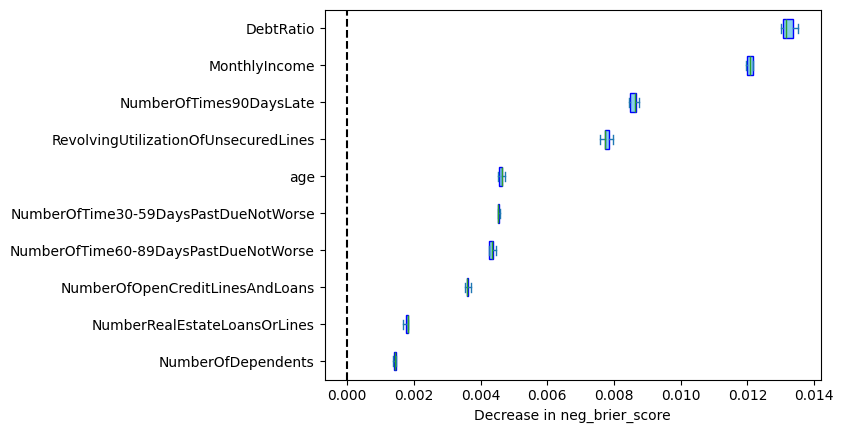

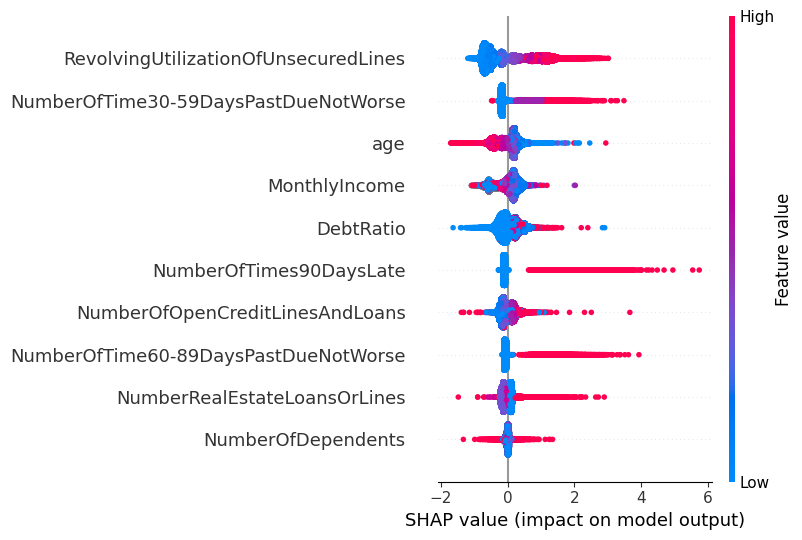

best_feature_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV  0.500000           0.574936   0.548799  0.159243  0.246717   
1      Test  0.160804           0.723786   0.339715  0.519950  0.410939   

        AUC        KS     Brier  
0  0.844617  0.540214  0.051613  
1  0.844409  0.538075  0.051272

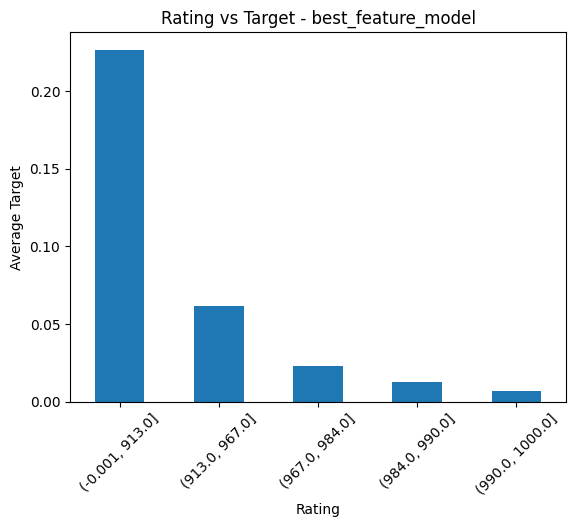

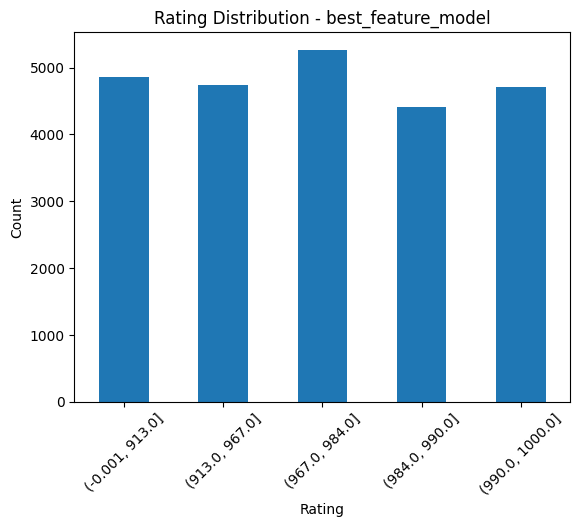

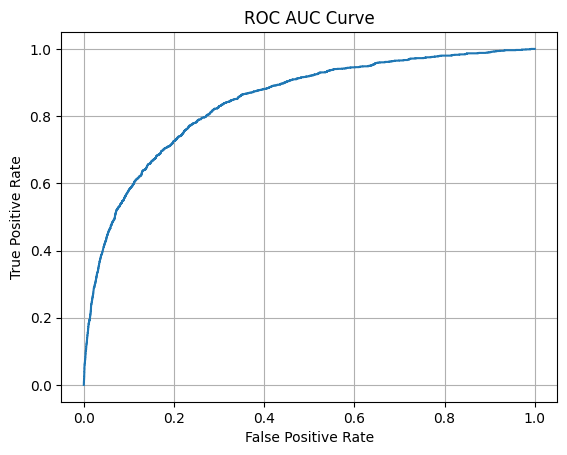

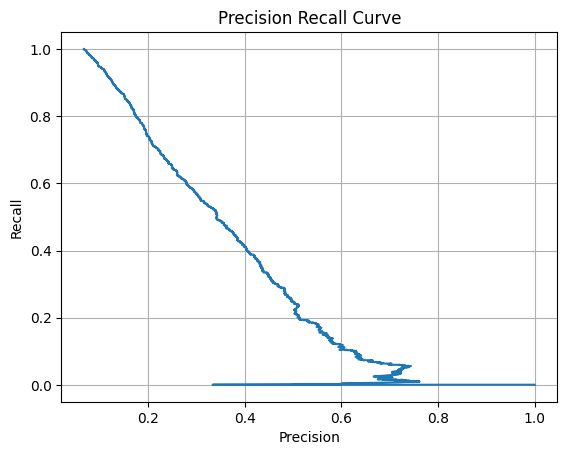

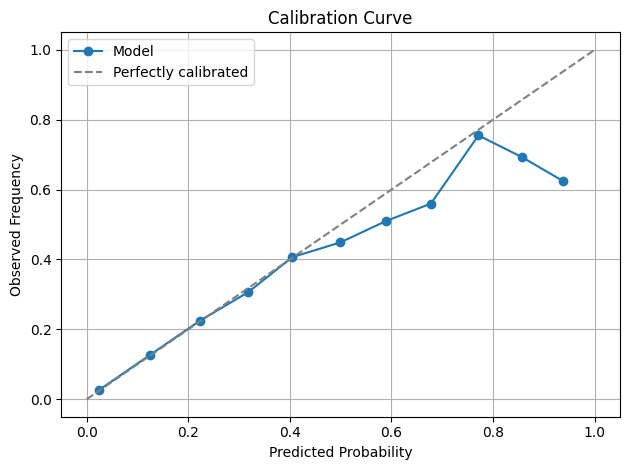

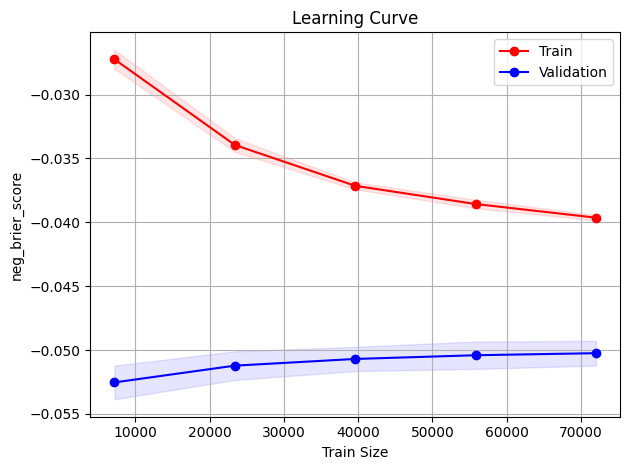

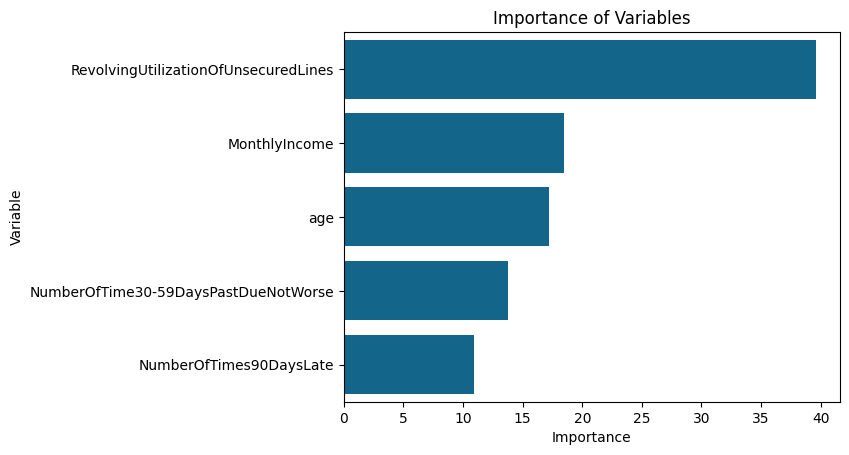

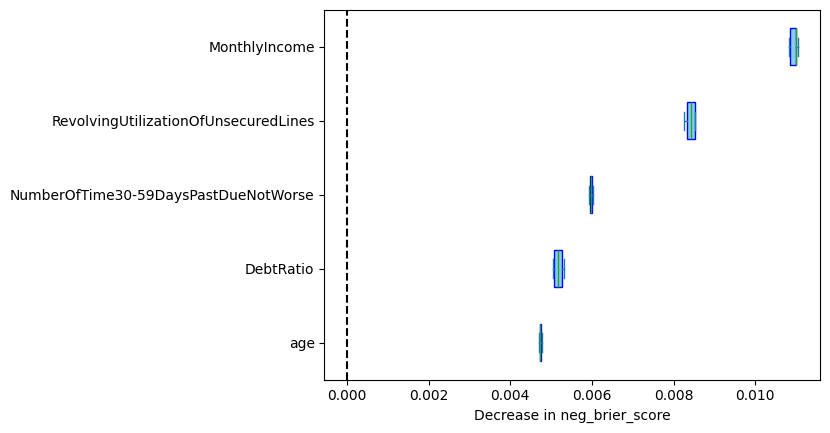

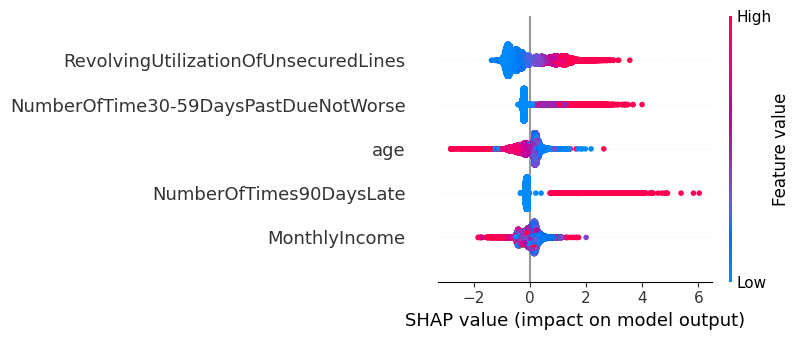

best_params_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV   0.50000           0.578684   0.582108  0.165893  0.258069   
1      Test   0.20603           0.705824   0.396681  0.461970  0.426843   

        AUC        KS     Brier  
0  0.846962  0.546197  0.050458  
1  0.847291  0.538364  0.050380

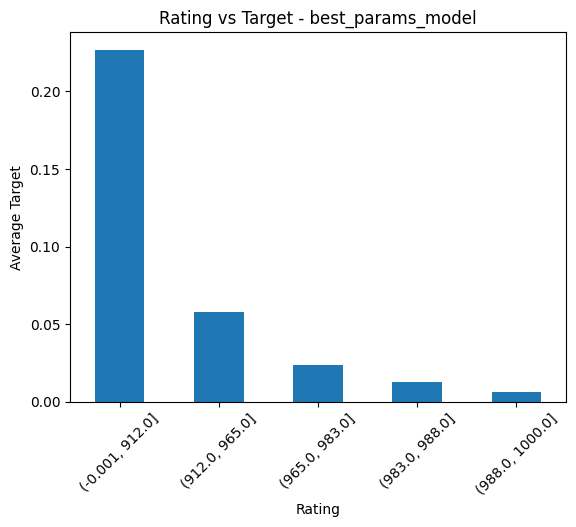

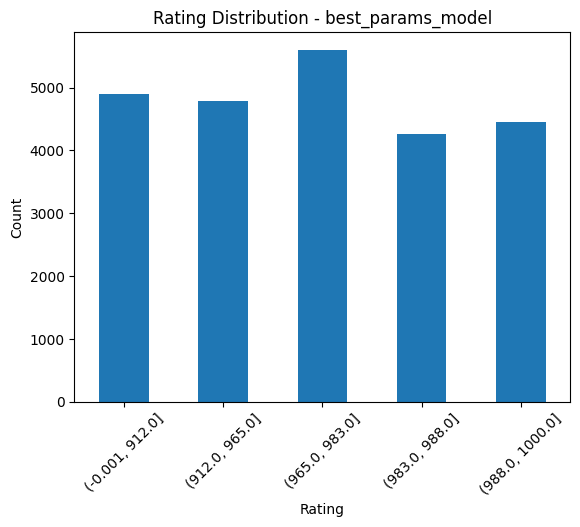

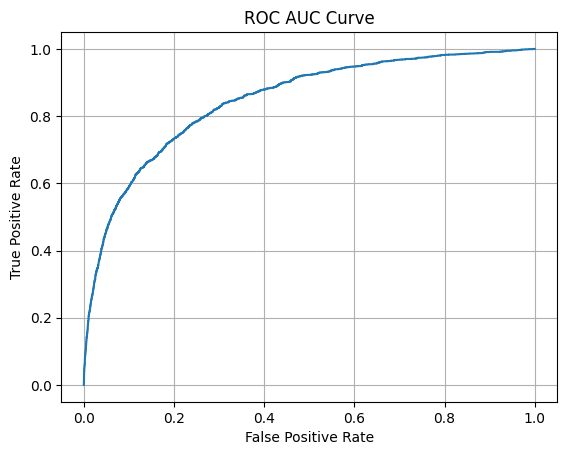

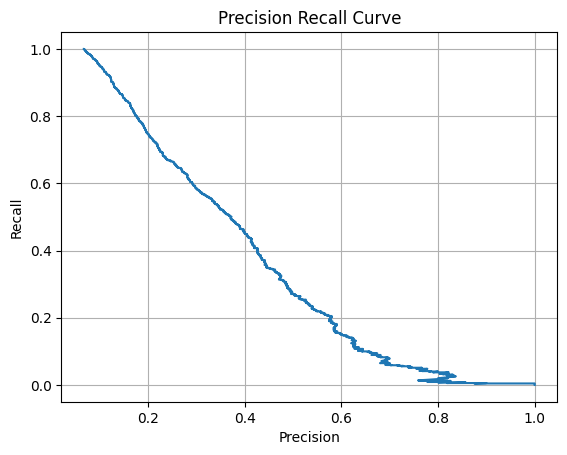

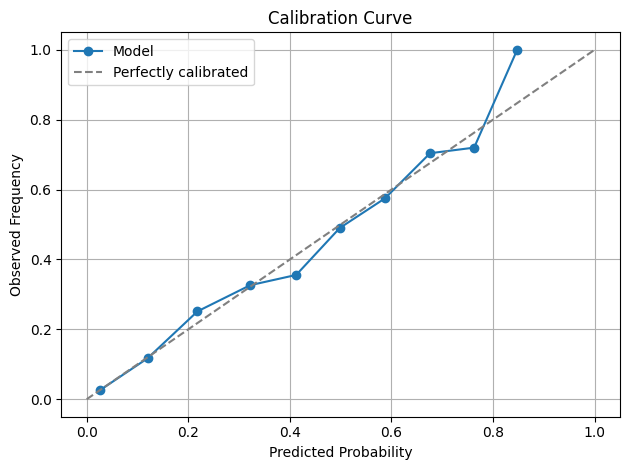

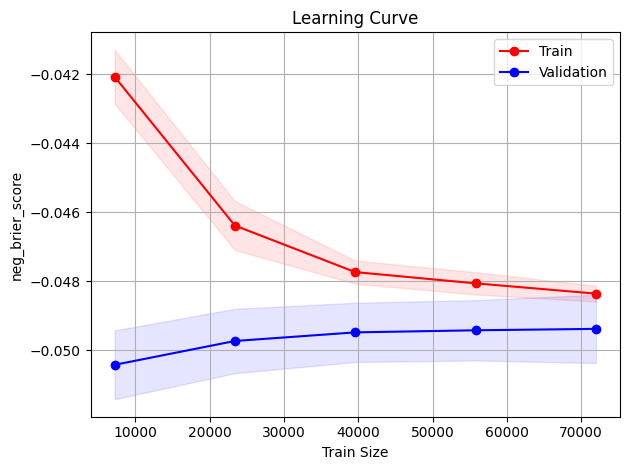

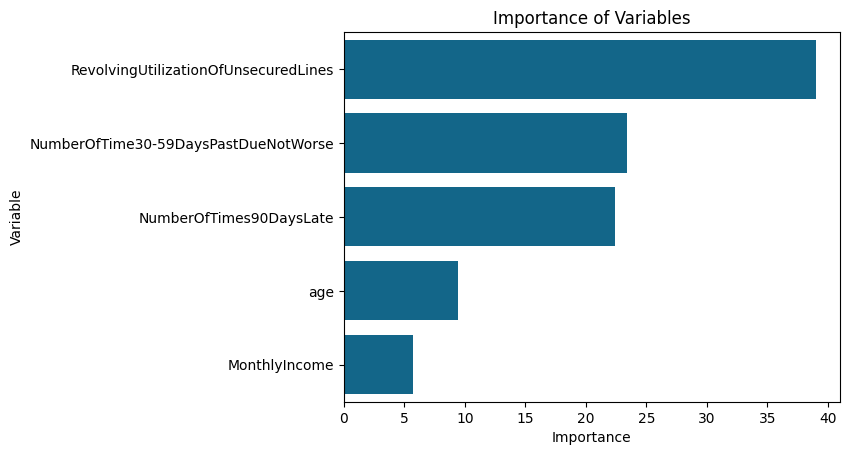

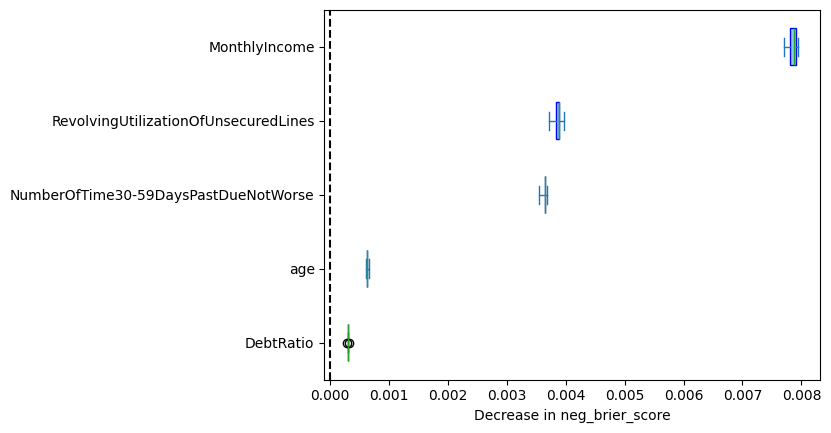

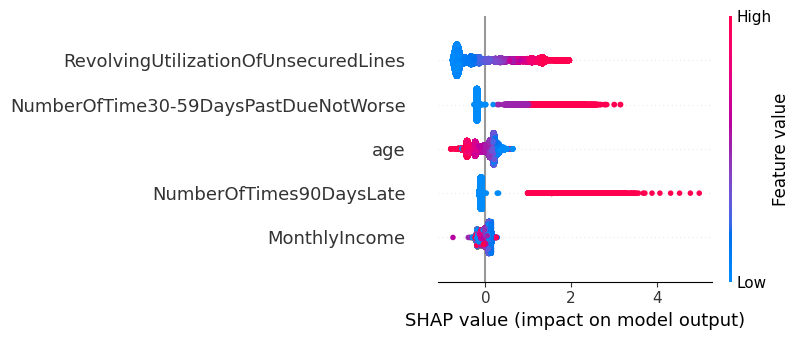

In [ ]:
acv.get_result_analysis()